# 구글 드라이브 연동

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Mecab 설치

In [5]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [6]:
!ls

gdrive	Mecab-ko-for-Google-Colab  sample_data


In [7]:
!bash /content/Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 46.9MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-08-30 06:58:47--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [8]:
from konlpy.tag import Mecab

In [9]:
mecab = Mecab()

In [10]:
text = '안녕하세요. 제 이름은 홍길동 입니다. 만나서 반갑습니다.'

In [11]:
noouns = mecab.nouns(text)

In [12]:
noouns

['안녕', '제', '이름', '홍길동']

# 데이터 로드

In [13]:
import numpy as np
import pandas as pd
# import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [14]:
data_path = '/content/gdrive/My Drive/Colab Notebooks/5.자연어처리&추천시스템(김준태)/mini_pro/'

In [15]:
data = pd.read_csv(data_path + 'reversed_data_after_preprocessing.csv', nrows=5000)
print(len(data))

5000


In [16]:
data.head()

,title,content
0,서해상으로 북상 중인 태풍 바비 피해 줄이려면,Q 특히 농어촌에서 어떤 피해가 발생할지가 걱정인데요 Q 도심 집에 계신 ...
1,새벽 4시 5시 사이 서울 근접 이 시각 서울시 재난안전상황실,만약 이런 피해가 발생하면 가까운 구청 상황실이나 다산콜센터 등에 연락하시면 됩니...
2,코로나 때문에 봉사시간 못 채워 졸업 막힌 대학생들,정부 차원의 대책 마련이 필요하다는 의견도 나온다 코로나19라는 비상 상황인 만...
3,성인 남자가 서 있기 힘들 정도 태풍 바비 군산 도착,지금까지 전북 군산 비응항에서 YTN 김민성 입니다 이번 태풍 아무쪼록 큰 피해 ...
4,위험 반원 인천 초비상 초속 25m 넘으면 영종대교 통제,또 초속 25m 이상 바람이 불 경우 인천공항으로 향하는 영종대교와 인천대교 차량 ...


# 데이터 정제

In [17]:
# 중복을 제외한 행의 수 확인
print(len(data))
print(data['title'].nunique())
print(data['content'].nunique())

5000
4855
4914


In [18]:
# title 중복 제거
data.drop_duplicates(subset=['title'], inplace=True)
print(len(data))

4855


In [19]:
# content 중복 제거
data.drop_duplicates(subset=['content'], inplace=True)
print(len(data))

4825


In [20]:
# 결측치 제거
data = data.dropna(axis=0)
print(len(data))

4824


제목의 최소 길이 : 1
제목의 최대 길이 : 18
제목의 평균 길이 : 8.124585406301824
내용의 최소 길이 : 28
내용의 최대 길이 : 3480
내용의 평균 길이 : 260.4278606965174


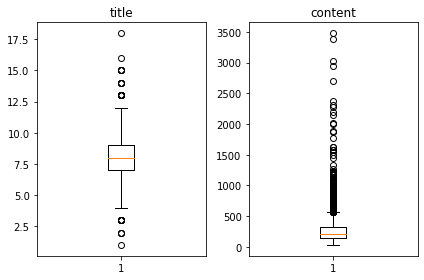

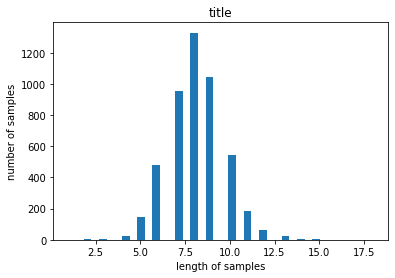

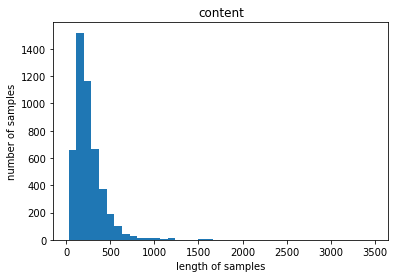

In [21]:
# 데이터 시각화로 확인
title_len = [len(t.split()) for t in data['title']]
content_len = [len(c.split()) for c in data['content']]

print('제목의 최소 길이 : {}'.format(np.min(title_len)))
print('제목의 최대 길이 : {}'.format(np.max(title_len)))
print('제목의 평균 길이 : {}'.format(np.mean(title_len)))
print('내용의 최소 길이 : {}'.format(np.min(content_len)))
print('내용의 최대 길이 : {}'.format(np.max(content_len)))
print('내용의 평균 길이 : {}'.format(np.mean(content_len)))

plt.subplot(1,2,1)
plt.boxplot(title_len)
plt.title('title')
plt.subplot(1,2,2)
plt.boxplot(content_len)
plt.title('content')
plt.tight_layout()
plt.show()

plt.title('title')
plt.hist(title_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('content')
plt.hist(content_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
title_max_len = 12
content_max_len = 600

In [23]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [24]:
below_threshold_len(title_max_len, data['title'])

전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9925373134328358


In [25]:
below_threshold_len(content_max_len, data['content'])

전체 샘플 중 길이가 600 이하인 샘플의 비율: 0.9626865671641791


In [26]:
data = data[data['title'].apply(lambda t: len(t.split()) <= title_max_len)]
data = data[data['content'].apply(lambda c: len(c.split()) <= content_max_len)]
print(len(data))

4613


In [27]:
# data['decoder_input'] = data['title'].apply(lambda x : 'start '+ x)
# data['decoder_target'] = data['title'].apply(lambda x : x + ' end')
# data.head()

In [28]:
encoder = np.array(data['content'])
decoder = np.array(data['title'])
# decoder_target = np.array(data['decoder_target'])

# 정수 인코딩

In [29]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [30]:
content_tokenizer = Mecab()
title_tokenizer = Mecab()

In [31]:
encoder_input_tokenized = []
decoder_input_tokenized = []
decoder_target_tokenized = []

for sentence in encoder:
    temp = []
    temp = content_tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    encoder_input_tokenized.append(temp)

for sentence in decoder:
    temp = []
    temp = title_tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    temp.insert(0,'<start>')
    decoder_input_tokenized.append(temp)

for sentence in decoder:
    temp = []
    temp = title_tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    temp.append('<end>')
    decoder_target_tokenized.append(temp)

In [32]:
print(encoder_input_tokenized[:5])
print(decoder_input_tokenized[:5])
print(decoder_target_tokenized[:5])

[['Q', '특히', '농어촌', '에서', '어떤', '피해', '발생', '할지', '걱정', '인데요', 'Q', '도심', '집', '계신', '분', '어떻게', '대비', '해야', '합니까', 'Q', '특히', '고층', '아파트', '유리창', '깨지', '피해', '태풍', '때', '종종', '발생', '했잖아요', '그때', '신문지', '붙인다', '든가', '테이프', '붙여', '놓', '으면', '예방', '되', '나요', 'Q', '요즘', '창틀', '창틀', '사이', '헐거운', '부분', '을', '고정', '하', '게', '중요', '하', '다고', '하', '던데', 'Q', '태풍', '한창', '일', '때', '운전', '을', '하', '지', '않', '게', '가장', '좋', '겠', '습니다', '만', '어쩔', '수', '없이', '운전', '을', '해야', '되', '경우', '있', '잖아요', '이럴', '때', '어떻게', '조심', '해야', '됩니까', 'Q', '도심', '강풍', '피해', '로', '대표', '적', '간판', '떨어진다', '든가', '교회', '첨탑', '무너지', '경우', '있', '었', '습니다', 'Q', '이렇게', '서해', '상', '태풍', '올라오', '면', '주로', '어떤', '피해', '발생', '하', '나요', '이번', '바람', '피해', '강할', '것', '같', '습니다', '강원', '대학교', '방재', '전문', '대학원', '김병식', '교수', '님', '모시', '고', '태풍', '피해', '어떻게', '대응', '해야', '하', '는지', '자세', '얘기', '나눠', '보', '겠', '습니다'], ['만약', '이런', '피해', '발생', '하', '면', '가까운', '구청', '상황실', '이나', '다산', '콜', '센터', '등', '연락', '하', '시', '면', '됩니다', '또',

In [33]:
# 단어 집합의 크기
from nltk import FreqDist

encoder_vocab = FreqDist(np.hstack(encoder_input_tokenized))
decoder_vocab = FreqDist(np.hstack(decoder_input_tokenized))

print(len(encoder_vocab))
print(len(decoder_vocab))

26560
6768


In [34]:
encoder_vocab_size = 25000
decoder_vocab_size = 6000
encoder_vocab = encoder_vocab.most_common(encoder_vocab_size)
decoder_vocab = decoder_vocab.most_common(decoder_vocab_size)

print(len(encoder_vocab))
print(len(decoder_vocab))

25000
6000


In [35]:
encoder_input_word_to_index = {word[0]: index + 2 for index, word in enumerate(encoder_vocab)}
decoder_input_word_to_index = {word[0]: index + 2 for index, word in enumerate(decoder_vocab)}
decoder_target_word_to_index = {word[0]: index + 2 for index, word in enumerate(decoder_vocab)}

In [36]:
input_encoded = []
input_decoded = []
target_decoded = []

for i in encoder_input_tokenized:
    temp = []
    for w in i:
        try:
            temp.append(encoder_input_word_to_index[w])
        except KeyError:
            temp.append(0)
    input_encoded.append(temp)

for i in decoder_input_tokenized:
    temp = []
    for w in i:
        try:
            temp.append(decoder_input_word_to_index[w])
        except KeyError:
            temp.append(0)
    input_decoded.append(temp)

for i in decoder_target_tokenized:
    temp = []
    for w in i:
        try:
            temp.append(decoder_target_word_to_index[w])
        except KeyError:
            temp.append(0)
    target_decoded.append(temp)

In [37]:
print(input_encoded[:5])
print(input_decoded[:5])
print(target_decoded[:5])

[[3068, 313, 5624, 9, 882, 99, 63, 1411, 747, 1088, 3068, 1301, 349, 3694, 138, 826, 334, 169, 9963, 3068, 313, 7160, 497, 2267, 3511, 99, 40, 152, 4896, 63, 11887, 3379, 5278, 15313, 13277, 3069, 4472, 707, 498, 715, 32, 2994, 3068, 3035, 3469, 3469, 471, 15314, 654, 3, 1704, 5, 42, 659, 5, 58, 5, 9964, 3068, 40, 5466, 8, 152, 2023, 3, 5, 17, 36, 42, 244, 666, 82, 15, 43, 3332, 27, 440, 2023, 3, 169, 32, 124, 6, 3630, 6384, 152, 826, 2124, 169, 8276, 3068, 1301, 246, 99, 11, 328, 19, 1279, 9301, 13277, 65, 6173, 2500, 124, 6, 44, 15, 3068, 883, 676, 198, 40, 1971, 31, 1575, 882, 99, 63, 5, 2994, 174, 172, 99, 3971, 13, 143, 15, 711, 1348, 4473, 903, 2125, 18787, 388, 682, 9965, 4, 40, 99, 826, 305, 169, 5, 519, 1609, 1266, 2193, 108, 82, 15], [1883, 525, 99, 63, 5, 31, 1674, 1250, 1445, 262, 10802, 2643, 268, 14, 871, 5, 25, 31, 577, 122, 2141, 1109, 1035, 6, 3, 27, 6, 15, 2108, 5279, 262, 3036, 587, 1279, 497, 2267, 14, 172, 2358, 31, 178, 15315, 27, 6, 355, 1333, 3, 5, 17, 36, 42, 2

# 빈 샘플 제거

In [38]:
drop_row = [index for index, sentence in enumerate(input_decoded) if len(sentence) == 1]

In [39]:
print(len(drop_row))

0


# 패딩

In [40]:
max_len = max(len(l) for l in input_encoded)
print(max_len)

1001


In [41]:
max_len = max(len(l) for l in input_decoded)
print(max_len)

21


In [42]:
input_encoded = pad_sequences(input_encoded, padding='post')
input_decoded = pad_sequences(input_decoded, padding='post')
target_decoded = pad_sequences(target_decoded, padding='post')

In [43]:
print(input_encoded.shape)
print(input_decoded.shape)
print(target_decoded.shape)

(4613, 1001)
(4613, 21)
(4613, 21)


In [44]:
print(input_encoded[:3])
print(input_decoded[:3])
print(target_decoded[:3])

[[3068  313 5624 ...    0    0    0]
 [1883  525   99 ...    0    0    0]
 [  75 1319  201 ...    0    0    0]]
[[   2  899   78   79   27  168    6   19   61 1357 1808    0    0    0
     0    0    0    0    0    0    0]
 [   2  318   55   58   44   58  900   23  207  305  153  145  489 2173
     0    0    0    0    0    0    0]
 [   2    5  416 3831  250   95 3832 2174 1555 2752    0    0    0    0
     0    0    0    0    0    0    0]]
[[ 899   78   79   27  168    6   19   61 1357 1808    0    0    0    0
     0    0    0    0    0    0    0]
 [ 318   55   58   44   58  900   23  207  305  153  145  489 2173    0
     0    0    0    0    0    0    0]
 [   5  416 3831  250   95 3832 2174 1555 2752    0    0    0    0    0
     0    0    0    0    0    0    0]]


# 데이터 분리

In [45]:
indices = np.arange(input_encoded.shape[0])
np.random.shuffle(indices)
print(indices)

[  42 1404 2033 ... 1653 2607 2732]


In [46]:
input_encoded = input_encoded[indices]
input_decoded = input_decoded[indices]
target_decoded = target_decoded[indices]

In [47]:
n_of_val = int(len(input_encoded)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 922


In [48]:
input_encoded_train = input_encoded[:-n_of_val]
input_decoded_train = input_decoded[:-n_of_val]
target_decoded_train = target_decoded[:-n_of_val]

input_encoded_test = input_encoded[-n_of_val:]
input_decoded_test = input_decoded[-n_of_val:]
target_decoded_test = target_decoded[-n_of_val:]

In [49]:
print('훈련 데이터의 개수 :', len(input_encoded_train))
print('훈련 레이블의 개수 :',len(input_decoded_train))
print('테스트 데이터의 개수 :',len(input_encoded_test))
print('테스트 레이블의 개수 :',len(input_decoded_test))

훈련 데이터의 개수 : 3691
훈련 레이블의 개수 : 3691
테스트 데이터의 개수 : 922
테스트 레이블의 개수 : 922


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(encoder)
print(len(tokenizer_ko.word_index))

129246


# Training

In [50]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [53]:
# 인코더 모델
encoder_inputs = Input(shape=(1001,))

encoder_embed = Embedding(encoder_vocab_size+1, 50)(encoder_inputs)
encoder_mask = Masking(mask_value=0)(encoder_embed)

encoder_outputs, h_state, c_state = LSTM(50, return_state=True)(encoder_mask)

In [54]:
# 디코더 모델
decoder_inputs = Input(shape=(21,))

decoder_embed = Embedding(decoder_vocab_size+1, 50)(decoder_inputs)
decoder_mask = Masking(mask_value=0)(decoder_embed)

decoder_lstm = LSTM(50, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_mask, initial_state=[h_state, c_state])

decoder_dense = Dense(decoder_vocab_size+1, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_outputs)

In [55]:
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(x = [input_encoded_train, input_decoded_train], y = target_decoded_train, validation_data = ([input_encoded_test, input_decoded_test], target_decoded_test), batch_size = 128, epochs = 50)

Epoch 1/50
14/29 [=============>................] - ETA: 21s - loss: 8.2108 - acc: 0.4348

InvalidArgumentError: ignored

In [51]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [52]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(decoder_vocab_size, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1001)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1001, 128)    3200000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 1001, 256),  394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [53]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [input_encoded_train, input_decoded_train], y = target_decoded_train, \
          validation_data = ([input_encoded_test, input_decoded_test], target_decoded_train),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
